In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

%matplotlib inline


df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.dropna(inplace = True)
df.drop('id',axis = 1, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [5]:
df['gender'].replace('Other',df['gender'].mode().values[0], inplace = True)

In [6]:
df['gender'].value_counts()

Female    2898
Male      2011
Name: gender, dtype: int64

In [7]:
plt.style.use("ggplot")

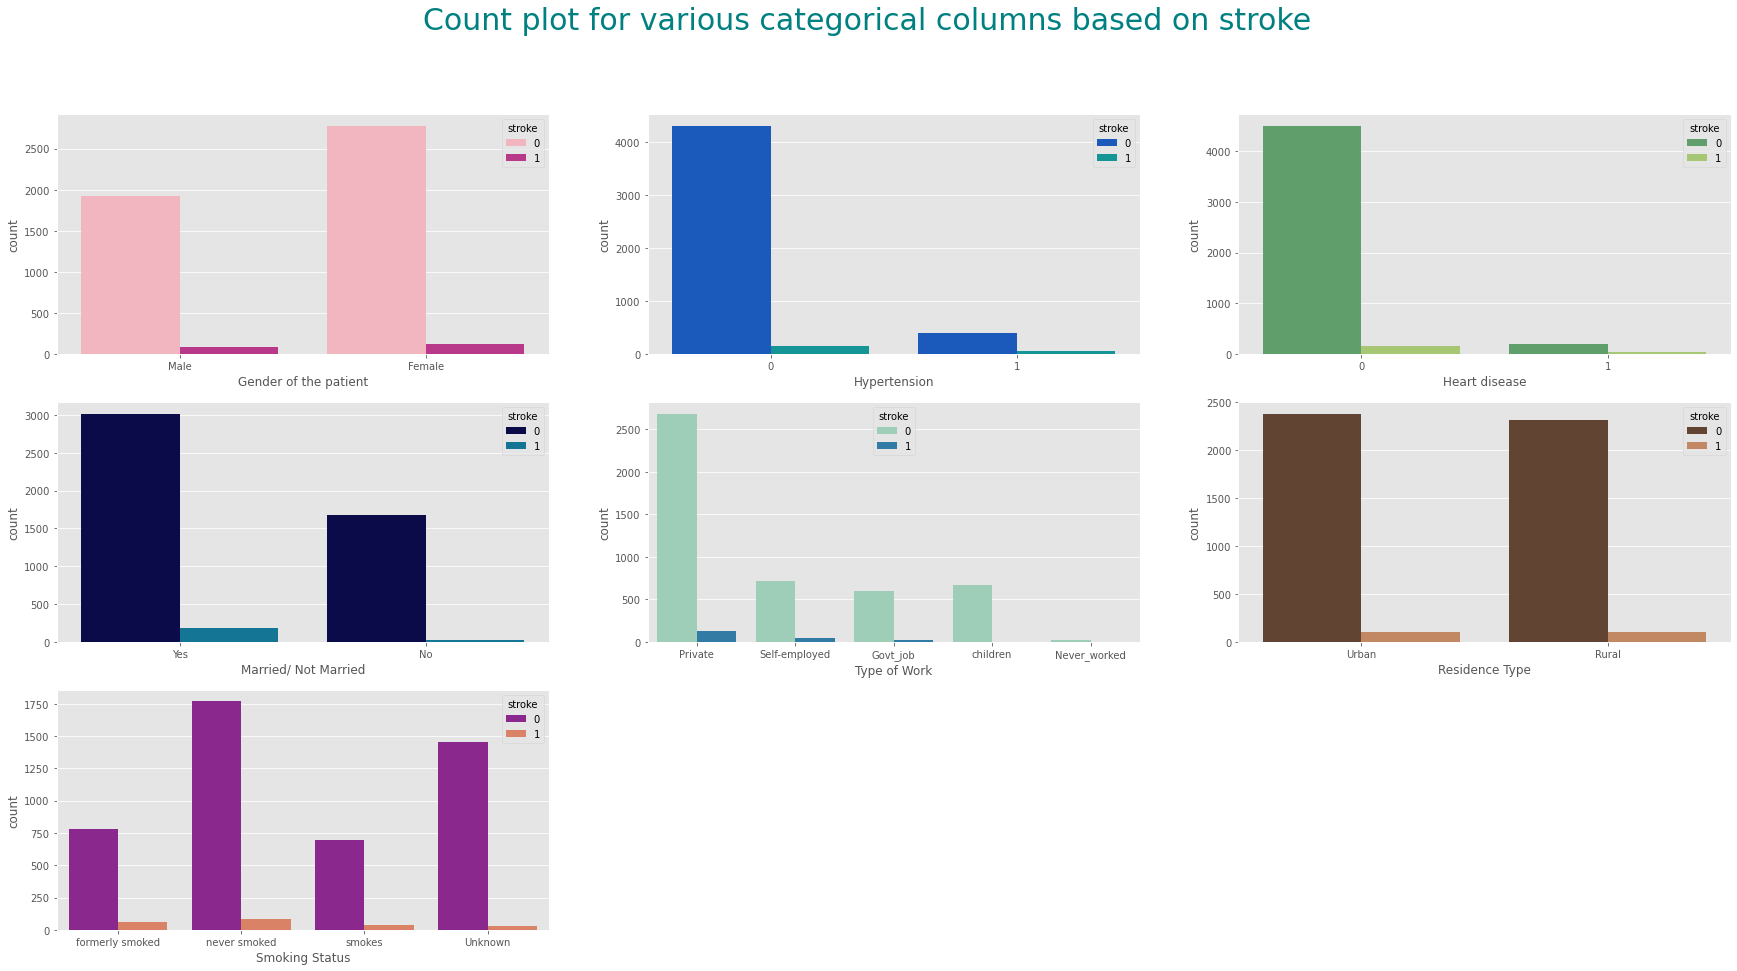

In [8]:
# plot categorical columns against stroke

fig, ax = plt.subplots(3, 3, figsize = (30, 15))
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.suptitle('Count plot for various categorical columns based on stroke', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x = 'gender', data = df, hue= 'stroke', ax = ax[0,0], palette = 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x = 'hypertension', data = df, hue= 'stroke', ax = ax[0,1], palette = 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x = 'heart_disease', data = df, hue = 'stroke', ax = ax[0,2], palette = 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x = 'ever_married', data = df, hue = 'stroke', ax = ax[1,0], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x = 'work_type', data = df, hue = 'stroke', ax = ax[1,1], palette = 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x = 'Residence_type', data = df, hue = 'stroke', ax = ax[1,2], palette = 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x = 'smoking_status', data = df, hue = 'stroke', ax = ax[2,0], palette = 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [9]:
# extract rows where stroke = 1

df_have_stroke = df[df['stroke'] == 1]
df_have_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [10]:
# number of male and female

df['gender'].value_counts()

Female    2898
Male      2011
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by gender'}, ylabel='stroke'>

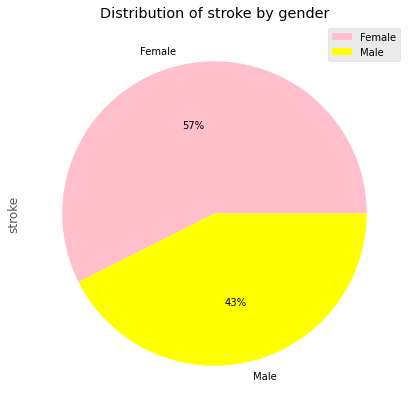

In [12]:
# percentage of stroke incidence by gender

df_have_stroke.groupby(['gender']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by gender', 
                                              figsize = (7,7), colors = ['pink', 'yellow'])

In [13]:
# number of samples with & without hypertension

df['hypertension'].value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by hypertension'}, ylabel='stroke'>

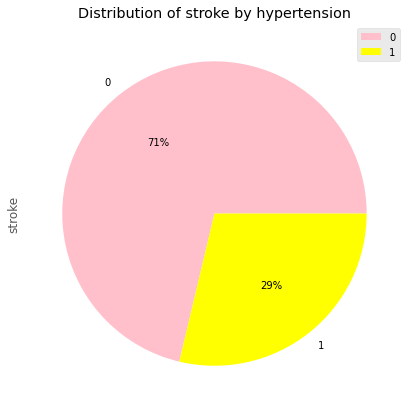

In [15]:
# percentage of stroke incidence by hypertension

df_have_stroke.groupby(['hypertension']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by hypertension', 
                                              figsize = (7,7), colors = ['pink', 'yellow'])

In [16]:
# number of ever married & never been married

df['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by marriage status'}, ylabel='stroke'>

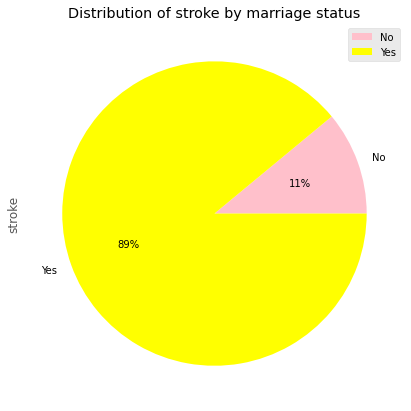

In [18]:
# percentage of stroke incidence by marriage status

df_have_stroke.groupby(['ever_married']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by marriage status', 
                                              figsize = (7,7), colors = ['pink', 'yellow'])

In [19]:
# Number of samples based on work type

df['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by work type'}, ylabel='stroke'>

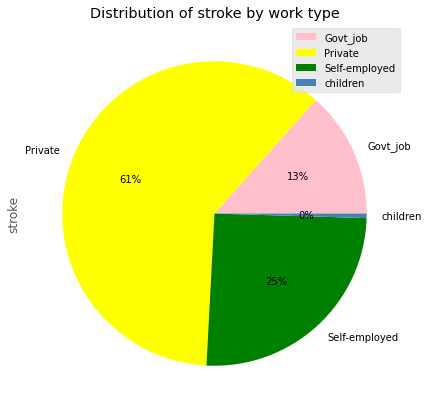

In [20]:
# percentage of stroke incidence by work type

df_have_stroke.groupby(['work_type']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by work type', 
                                              figsize = (7,7), colors = ['pink', 'yellow','green','steelblue'])

In [21]:
# Number of samples based on smoking status

df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by smoking status'}, ylabel='stroke'>

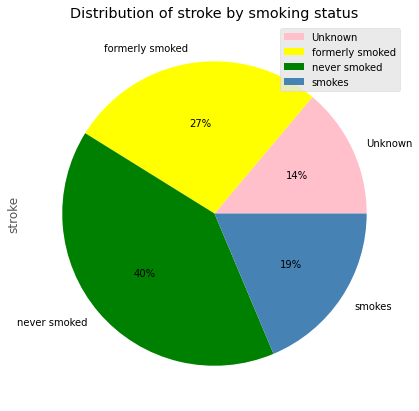

In [22]:
# percentage of stroke incidence by smoking status

df_have_stroke.groupby(['smoking_status']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by smoking status', 
                                              figsize = (7,7), colors = ['pink', 'yellow','green','steelblue'])

In [23]:
# Number of samples based on heart disease

df['heart_disease'].value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

<AxesSubplot:title={'center':'Distribution of stroke by heart disease'}, ylabel='stroke'>

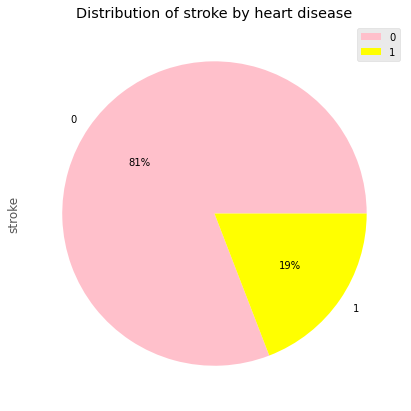

In [24]:
# percentage of stroke incidence by heart disease

df_have_stroke.groupby(['heart_disease']).sum().plot(kind='pie', y = 'stroke', autopct='%1.0f%%', 
                                              title = 'Distribution of stroke by heart disease', 
                                              figsize = (7,7), colors = ['pink', 'yellow','green','steelblue'])

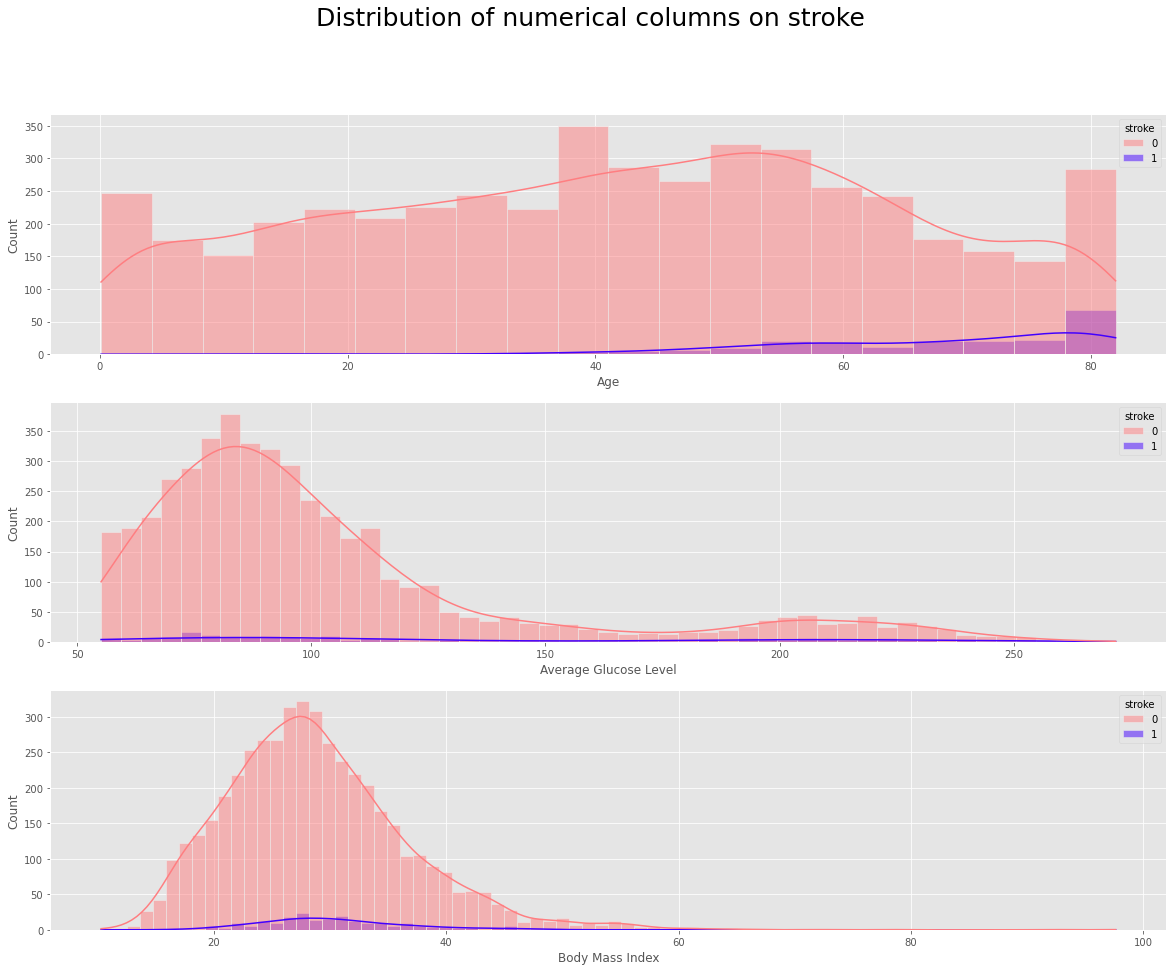

In [26]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Distribution of numerical columns on stroke', fontsize = 25)
sns.histplot(x = df['age'], hue= df['stroke'], kde= True, ax= ax[0], palette = 'gnuplot2_r')
ax[0].set(xlabel = 'Age')
sns.histplot(x = df['avg_glucose_level'], hue= df['stroke'], kde= True, ax= ax[1], palette = 'gnuplot2_r')
ax[1].set(xlabel = 'Average Glucose Level')
sns.histplot(x = df['bmi'], hue= df['stroke'], kde= True, ax= ax[2], palette = 'gnuplot2_r')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

In [27]:
# dummy coding categorical variables

df = pd.get_dummies(df, columns=['gender','ever_married','work_type','Residence_type','smoking_status'], 
                    drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [28]:
# move column 'stroke' to the last 

df1 = df.pop('stroke')
df['stroke'] = df1
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1,0,0,1
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.0,0,1,0,0,1,0,0,0,1,0,1
5,81.0,0,0,186.21,29.0,1,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,1,0,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,1,0,1,0,1,0,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,1,1,0,1,0,0,0,1,0,0,0


In [30]:
X = df.iloc[:,0:15]
y = df[['stroke']]

In [31]:
# logistic regression

log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.161009
         Iterations 19


In [32]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4894
Method:                           MLE   Df Model:                           14
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                 0.08540
Time:                        18:27:18   Log-Likelihood:                -790.39
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 2.166e-24
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age                                0.0324      0.004      7.246      0.000       0.024       0.041
hypertension                       0.9885      0.178      5.566      0.

In [33]:
# logistic regression

odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                          OR  Lower CI  Upper CI
age                             1.032954e+00  1.023934  1.042052
hypertension                    2.687269e+00  1.897358  3.806037
heart_disease                   2.108461e+00  1.391396  3.195070
avg_glucose_level               1.003226e+00  1.000509  1.005950
bmi                             8.803301e-01  0.863545  0.897442
gender_Male                     8.734787e-01  0.653650  1.167238
ever_married_Yes                6.017253e-01  0.412722  0.877282
work_type_Never_worked          4.010608e-67  0.000000       inf
work_type_Private               4.652951e-01  0.336789  0.642835
work_type_Self-employed         4.233642e-01  0.278976  0.642482
work_type_children              1.274127e-02  0.001743  0.093135
Residence_type_Urban            7.598031e-01  0.578126  0.998573
smoking_status_formerly smoked  7.699771e-01  0.513573  1.154393
smoking_status_never smoked     5.669792e-01  0.396730  0.810287
smoking_status_smokes    

/Users/sinyi/Desktop/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
